In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [107]:
df = pd.read_csv("application_data.csv") # Load data

In [108]:
df.shape

(6149, 122)

In [109]:
df["DAYS_EMPLOYED"].describe()

count      6149.000000
mean      65954.099040
std      143038.005409
min      -15059.000000
25%       -2735.000000
50%       -1172.000000
75%        -266.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [110]:
365243 /365

1000.6657534246575

# check Missing Values

In [68]:
df.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     820
AMT_REQ_CREDIT_BUREAU_WEEK    820
AMT_REQ_CREDIT_BUREAU_MON     820
AMT_REQ_CREDIT_BUREAU_QRT     820
AMT_REQ_CREDIT_BUREAU_YEAR    820
Length: 122, dtype: int64

In [69]:
# Drop Unnecessary data
drop = ["SK_ID_CURR", "OWN_CAR_AGE", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", 
 "FLAG_CONT_MOBILE", "FLAG_PHONE", "EXT_SOURCE_1", "EXT_SOURCE_2", 
 "EXT_SOURCE_3", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",
 "YEARS_BUILD_AVG","COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", 
 "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG","LIVINGAPARTMENTS_AVG",
 "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE",
 "BASEMENTAREA_MODE",'YEARS_BEGINEXPLUATATION_MODE',"YEARS_BUILD_MODE","COMMONAREA_MODE",
 "ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE",
 'LIVINGAPARTMENTS_MODE', "LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE",
 "APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI",
 "COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI",
"LANDAREA_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI",
 "TOTALAREA_MODE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
 "DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4",
 "FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10",
 "FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15",
 "FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21",
 "APARTMENTS_AVG", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "OCCUPATION_TYPE", 
 "FLAG_MOBIL", "FLAG_EMAIL"]

df.drop(drop, axis=1, inplace=True)

In [70]:
df.isna().sum()
df.dropna(inplace=True)

In [71]:
df.shape

(5297, 38)

In [72]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

# Numeric variables

In [73]:
df.describe()
df.drop(["AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK",
         "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_YEAR",
         "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON"],axis=1, inplace=True)

In [74]:
drop = ["REG_REGION_NOT_LIVE_REGION",
        "REG_REGION_NOT_WORK_REGION",
        "LIVE_REGION_NOT_WORK_REGION",
        "REG_CITY_NOT_LIVE_CITY",
        "REG_CITY_NOT_WORK_CITY",
        "LIVE_CITY_NOT_WORK_CITY"]
df.drop(drop, axis=1, inplace=True)

In [75]:
df.describe()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  5297.000000   5297.000000      5.297000e+03  5.297000e+03   
mean      0.076081      0.413819      1.911381e+05  6.001521e+05   
std       0.265152      0.709361      1.608227e+06  3.995408e+05   
min       0.000000      0.000000      2.835000e+04  4.500000e+04   
25%       0.000000      0.000000      1.125000e+05  2.700000e+05   
50%       0.000000      0.000000      1.485000e+05  5.212800e+05   
75%       0.000000      1.000000      2.025000e+05  8.140410e+05   
max       1.000000      6.000000      1.170000e+08  2.925000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count    5297.000000     5.297000e+03                 5297.000000   
mean    27038.003209     5.396492e+05                    0.020988   
std     14480.070597     3.671730e+05                    0.013521   
min      2893.500000     4.500000e+04                    0.000938   
25%     16326.000000     2.385000e+05                    0.010032   
50%     24997.500000     4.500000e+05                    0.019101   
75%     34114.500000     6.840000e+05                    0.028663   
max    213291.000000     2.925000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count   5297.000000    5297.000000        5297.000000      5297.000000   
mean  -16131.009817   66068.196715       -4933.986596     -3047.124976   
std     4312.463585  143197.271008        3540.657749      1482.609648   
min   -25187.000000  -15059.000000      -19513.000000     -6152.000000   
25%   -19707.000000   -2815.000000       -7427.000000     -4299.000000   
50%   -15821.000000   -1215.000000       -4414.000000     -3336.000000   
75%   -12603.000000    -284.000000       -1898.000000     -1828.000000   
max    -7709.000000  365243.000000           0.000000        -1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count      5297.000000           5297.000000                  5297.000000   
mean          2.151784              2.050595                     2.024542   
std           0.902745              0.509806                     0.500153   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max           8.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  
count              5297.000000  
mean                 12.055126  
std                   3.274625  
min                   0.000000  
25%                  10.000000  
50%                  12.000000  
75%                  14.000000  
max                  22.000000

In [76]:
df.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
ORGANIZATION_TYPE        

/var/folders/sv/npxlc_k53696tn8hryg5dx5w0000gn/T/ipykernel_2392/2776091565.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




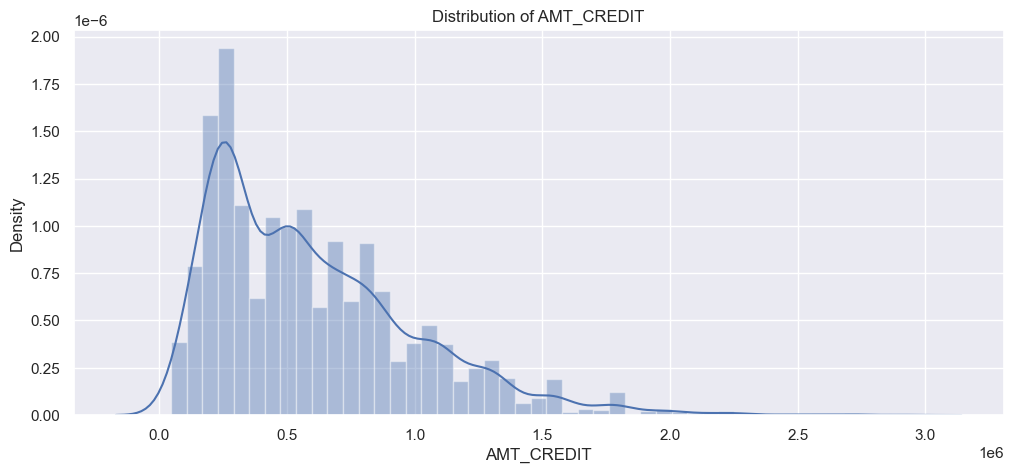

In [77]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(df["AMT_CREDIT"])

/var/folders/sv/npxlc_k53696tn8hryg5dx5w0000gn/T/ipykernel_2392/854655729.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




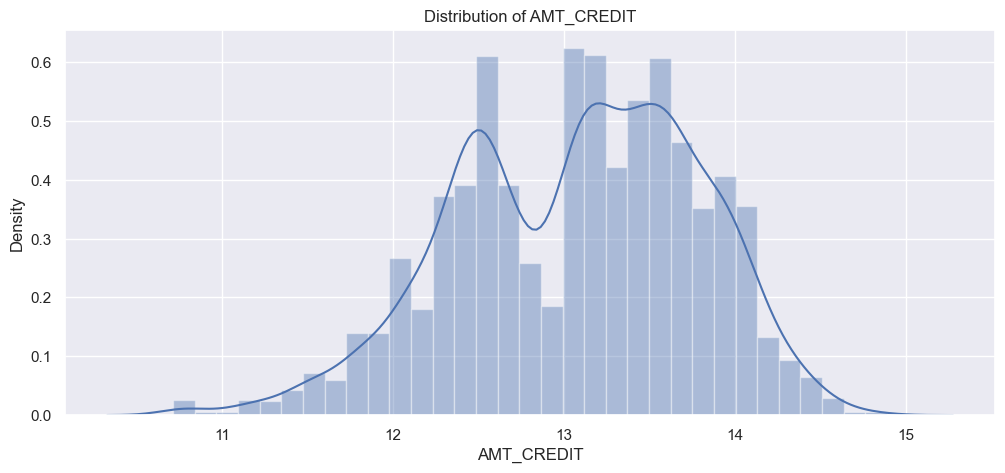

In [78]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(np.log(df["AMT_CREDIT"]))

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(df["AMT_INCOME_TOTAL"].dropna())

/var/folders/sv/npxlc_k53696tn8hryg5dx5w0000gn/T/ipykernel_2392/3108533166.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




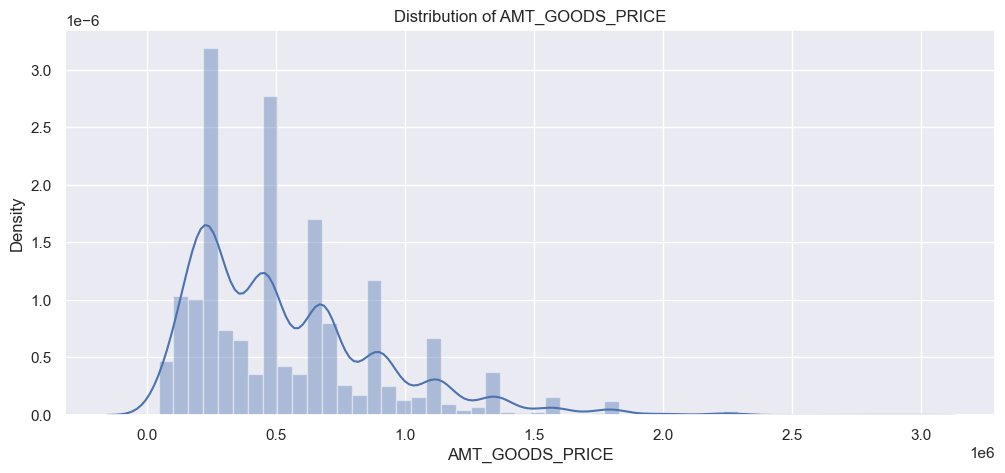

In [80]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(df["AMT_GOODS_PRICE"].dropna())

Some of variables such as Region_rating_client_W_CITY has very bad distribution. 

In [81]:
df.describe()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  5297.000000   5297.000000      5.297000e+03  5.297000e+03   
mean      0.076081      0.413819      1.911381e+05  6.001521e+05   
std       0.265152      0.709361      1.608227e+06  3.995408e+05   
min       0.000000      0.000000      2.835000e+04  4.500000e+04   
25%       0.000000      0.000000      1.125000e+05  2.700000e+05   
50%       0.000000      0.000000      1.485000e+05  5.212800e+05   
75%       0.000000      1.000000      2.025000e+05  8.140410e+05   
max       1.000000      6.000000      1.170000e+08  2.925000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count    5297.000000     5.297000e+03                 5297.000000   
mean    27038.003209     5.396492e+05                    0.020988   
std     14480.070597     3.671730e+05                    0.013521   
min      2893.500000     4.500000e+04                    0.000938   
25%     16326.000000     2.385000e+05                    0.010032   
50%     24997.500000     4.500000e+05                    0.019101   
75%     34114.500000     6.840000e+05                    0.028663   
max    213291.000000     2.925000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count   5297.000000    5297.000000        5297.000000      5297.000000   
mean  -16131.009817   66068.196715       -4933.986596     -3047.124976   
std     4312.463585  143197.271008        3540.657749      1482.609648   
min   -25187.000000  -15059.000000      -19513.000000     -6152.000000   
25%   -19707.000000   -2815.000000       -7427.000000     -4299.000000   
50%   -15821.000000   -1215.000000       -4414.000000     -3336.000000   
75%   -12603.000000    -284.000000       -1898.000000     -1828.000000   
max    -7709.000000  365243.000000           0.000000        -1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count      5297.000000           5297.000000                  5297.000000   
mean          2.151784              2.050595                     2.024542   
std           0.902745              0.509806                     0.500153   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max           8.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  
count              5297.000000  
mean                 12.055126  
std                   3.274625  
min                   0.000000  
25%                  10.000000  
50%                  12.000000  
75%                  14.000000  
max                  22.000000

In [82]:
num_vars = df.select_dtypes(include=['float', 'int']).columns.tolist()

# Plot each numerical variable
for var in num_vars:
    fig = px.box(df, x=var)
    fig.show()

# Categorical EDA&Trans

### Target

In [83]:
import plotly.graph_objects as go
import plotly.express as px
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    return fig
    
bar_hor(df, "TARGET", "Distribution of Target Variable" ,
        ["#96D38C", '#FEBFB3'], h=350, w=600, lm=200, xlb = ['Target : 1','Target : 0'])

### gender

In [84]:
def gp(col, title):
    df1 = df[df["TARGET"] == 1]
    df0 = df[df["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(df[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

In [85]:
tr0 = bar_hor(df, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Number of Females are much more than number of Men in the data

### SUITE and Income

In [86]:
import plotly.graph_objects as go
temp = df["NAME_TYPE_SUITE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
fig

In [87]:
import plotly.graph_objects as go
temp = df["NAME_INCOME_TYPE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
fig

In [88]:
df["NAME_INCOME_TYPE"] = df["NAME_INCOME_TYPE"].map({"Commercial associate":"Businessman", 
                                                             "Student":"Unemployed", "Maternity leave":"Unemployed",
                                                            "State servant":"State servent", "Working":"Working",
                                                            "Unemployed":"Unemployed","Pensioner":"Pensioner"})

In [89]:
df["NAME_TYPE_SUITE"] = df["NAME_TYPE_SUITE"].map({"Spouse, partner": "Others",
                                                                 "Children":"Others","Other_B":"Others",
                                                                 "Other_A":"Others","Group of people":"Others",
                                                                 "Unaccompanied":"Unaccompanied","Family":"Family"})

In [90]:
df = df[df["NAME_INCOME_TYPE"] != "Unemployed"]

In [91]:
tr0 = bar_hor(df, "NAME_TYPE_SUITE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1 = bar_hor(df, "NAME_INCOME_TYPE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [92]:
tr1, tr2 = gp('NAME_TYPE_SUITE', 'Applicants Type Suites which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Type Suites distribution when Target = 1", "Applicants Type Suites distribution when Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);


tr1, tr2 = gp('NAME_INCOME_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Income Types when Target = 1", "Applicants Income Type When Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Car

In [93]:
temp = df["FLAG_OWN_CAR"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
fig

### EDU

In [94]:
tr1 = bar_hor(df, "NAME_EDUCATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(df, "NAME_HOUSING_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Education Type', 'Applicants Housing Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400,showlegend=False, margin=dict(l=100));
iplot(fig);


tr1, tr2 = gp('NAME_EDUCATION_TYPE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('NAME_HOUSING_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Education Types, Target=1", "Applicants Housing Type, Target=1"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=30));
iplot(fig);

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [95]:
tr1 = bar_hor(df, "NAME_FAMILY_STATUS", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(df, "FLAG_OWN_CAR", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['NAME_FAMILY_STATUS', 'FLAG OWN CAR' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400,showlegend=False, margin=dict(l=100));
iplot(fig);


tr1, tr2 = gp('NAME_FAMILY_STATUS', 'FLAG_OWN_CAR which repayed the loan')
tr3, tr4 = gp('FLAG_OWN_CAR', 'FLAG_OWN_CAR which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ['NAME_FAMILY_STATUS, target = 1', 'FLAG OWN CAR. target = 1'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=30));
iplot(fig);

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# standardized Numerical  

In [96]:
df.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
ORGANIZATION_TYPE        

In [97]:
df["TARGET"] = df["TARGET"].astype(str)

In [98]:
from sklearn.preprocessing import MinMaxScaler
# select only numerical columns
num_cols = df.select_dtypes(include=['float',"int"]).columns
# create scaler object
scaler = MinMaxScaler()
# fit and transform data using scaler
scaled_data = scaler.fit_transform(df[num_cols])
# assign back to original column names
df.loc[:, num_cols] = scaled_data

In [99]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [100]:
df.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
count   5296.000000       5296.000000  5296.000000  5296.000000   
mean       0.068983          0.001391     0.192762     0.114755   
std        0.118234          0.013750     0.138743     0.068829   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000719     0.078125     0.063843   
50%        0.000000          0.001027     0.165375     0.105058   
75%        0.166667          0.001489     0.267028     0.148396   
max        1.000000          1.000000     1.000000     1.000000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE   DAYS_BIRTH  \
count      5296.000000                 5296.000000  5296.000000   
mean          0.171750                    0.280145     0.518113   
std           0.127502                    0.188943     0.246754   
min           0.000000                    0.000000     0.000000   
25%           0.067187                    0.127064     0.313480   
50%           0.140625                    0.253780     0.535845   
75%           0.221875                    0.387383     0.720019   
max           1.000000                    1.000000     1.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count    5296.000000        5296.000000      5296.000000      5296.000000   
mean        0.213175           0.747097         0.504828         0.164572   
std         0.376416           0.181437         0.241028         0.128956   
min         0.000000           0.000000         0.000000         0.000000   
25%         0.032195           0.619331         0.301374         0.142857   
50%         0.036401           0.773741         0.457893         0.142857   
75%         0.038851           0.902655         0.702975         0.285714   
max         1.000000           1.000000         1.000000         1.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count           5296.000000                  5296.000000   
mean               0.525208                     0.512179   
std                0.254843                     0.250010   
min                0.000000                     0.000000   
25%                0.500000                     0.500000   
50%                0.500000                     0.500000   
75%                0.500000                     0.500000   
max                1.000000                     1.000000   

       HOUR_APPR_PROCESS_START  
count              5296.000000  
mean                  0.548021  
std                   0.148795  
min                   0.000000  
25%                   0.454545  
50%                   0.545455  
75%                   0.636364  
max                   1.000000

/var/folders/sv/npxlc_k53696tn8hryg5dx5w0000gn/T/ipykernel_2392/1739910397.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




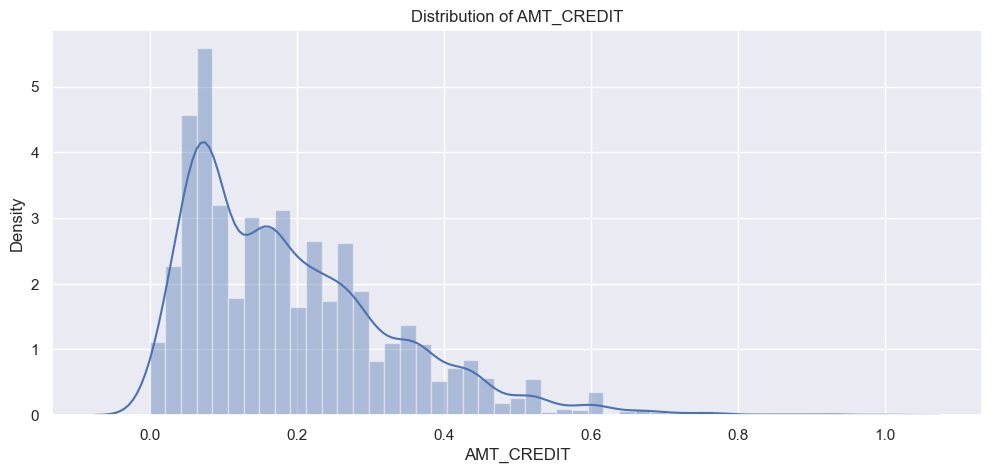

In [101]:
from scipy.stats import boxcox

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot((df["AMT_CREDIT"]))

# Feature Crossing

In [50]:
from sklearn.preprocessing import PolynomialFeatures
df_num = df[num_cols]

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
crossed = poly.fit_transform(df_num)

# create feature names manually
feature_names = poly.get_feature_names_out(df_num.columns)
feature_names = [name.replace(' ', '*') for name in feature_names]

# print the crossed features and their names
df_crossing = pd.DataFrame(crossed, columns=feature_names)

In [53]:
df_crossing.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      2.236032         -0.057275   -0.713707    -0.779527        -0.611812   
1      0.826267         -0.006909   -0.481026     0.367535        -0.464742   
2     -0.583498         -0.034890    0.198591    -0.041131         0.380909   
3     -0.583498         -0.034890   -0.877380     0.187286        -0.869184   
4     -0.583498          0.007082    2.171135     2.151991         2.207027   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.054874    0.194886      -0.462684           0.968039   
1                   -0.810270    0.890329      -0.462607           0.724539   
2                    0.722341    0.093549      -0.492969           0.620868   
3                    0.764792    1.039435      -0.475957           1.210692   
4                    3.810268   -0.473193      -0.499159          -1.210751   

   DAYS_ID_PUBLISH  ...  DAYS_ID_PUBLISH*CNT_FAM_MEMBERS  \
0         0.685231  ...                         1.402944   
1        -0.920920  ...                        -0.865205   
2        -0.464236  ...                         0.078179   
3         0.427545  ...                        -0.072000   
4         0.967201  ...                        -0.162880   

   DAYS_ID_PUBLISH*REGION_RATING_CLIENT  \
0                              1.276757   
1                              0.091101   
2                              0.045924   
3                             -0.042294   
4                             -1.993497   

   DAYS_ID_PUBLISH*REGION_RATING_CLIENT_W_CITY  \
0                                     1.337152   
1                                     0.044866   
2                                     0.022617   
3                                    -0.020829   
4                                    -1.981627   

   DAYS_ID_PUBLISH*HOUR_APPR_PROCESS_START  \
0                                -0.430512   
1                                 1.985352   
2                                -1.410292   
3                                 0.123246   
4                                 0.574301   

   CNT_FAM_MEMBERS*REGION_RATING_CLIENT  \
0                              3.814824   
1                             -0.092939   
2                              0.016659   
3                              0.016659   
4                              0.347095   

   CNT_FAM_MEMBERS*REGION_RATING_CLIENT_W_CITY  \
0                                     3.995280   
1                                    -0.045771   
2                                     0.008204   
3                                     0.008204   
4                                     0.345028   

   CNT_FAM_MEMBERS*HOUR_APPR_PROCESS_START  \
0                                -1.286329   
1                                -2.025408   
2                                -0.511587   
3                                -0.048544   
4                                -0.099994   

   REGION_RATING_CLIENT*REGION_RATING_CLIENT_W_CITY  \
0                                          3.635926   
1                                          0.004819   
2                                          0.004819   
3                                          0.004819   
4                                          4.222831   

   REGION_RATING_CLIENT*HOUR_APPR_PROCESS_START  \
0                                     -1.170630   
1                                      0.213263   
2                                     -0.300518   
3                                     -0.028516   
4                                     -1.223831   

   REGION_RATING_CLIENT_W_CITY*HOUR_APPR_PROCESS_START  
0                                          -1.226006    
1                                           0.105029    
2                                          -0.148001    
3                                          -0.014044    
4                                          -1.216544    

[5 rows x 105 columns]

In [54]:
df_crossing.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'DAYS_ID_PUBLISH*CNT_FAM_MEMBERS',
       'DAYS_ID_PUBLISH*REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH*REGION_RATING_CLIENT_W_CITY',
       'DAYS_ID_PUBLISH*HOUR_APPR_PROCESS_START',
       'CNT_FAM_MEMBERS*REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS*REGION_RATING_CLIENT_W_CITY',
       'CNT_FAM_MEMBERS*HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT*REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT*HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY*HOUR_APPR_PROCESS_START'],
      dtype='object', length=105)

In [ ]:
df_crossing["AMT_CREDIT*AMT_ANNUITY"]

<AxesSubplot: xlabel='AMT_CREDIT*AMT_ANNUITY', ylabel='AMT_ANNUITY'>

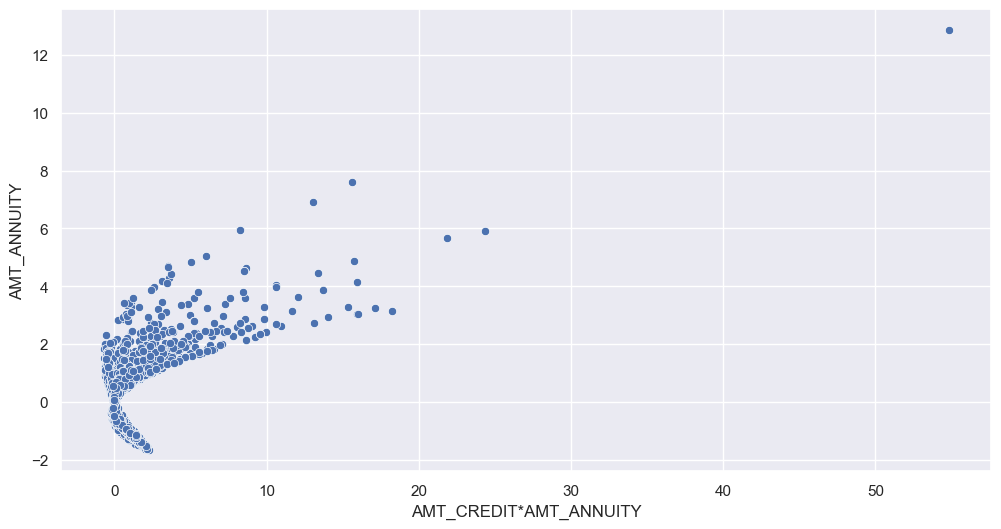

In [58]:
sns.scatterplot(data=df_crossing, x="AMT_CREDIT*AMT_ANNUITY", y="AMT_ANNUITY")

<AxesSubplot: >

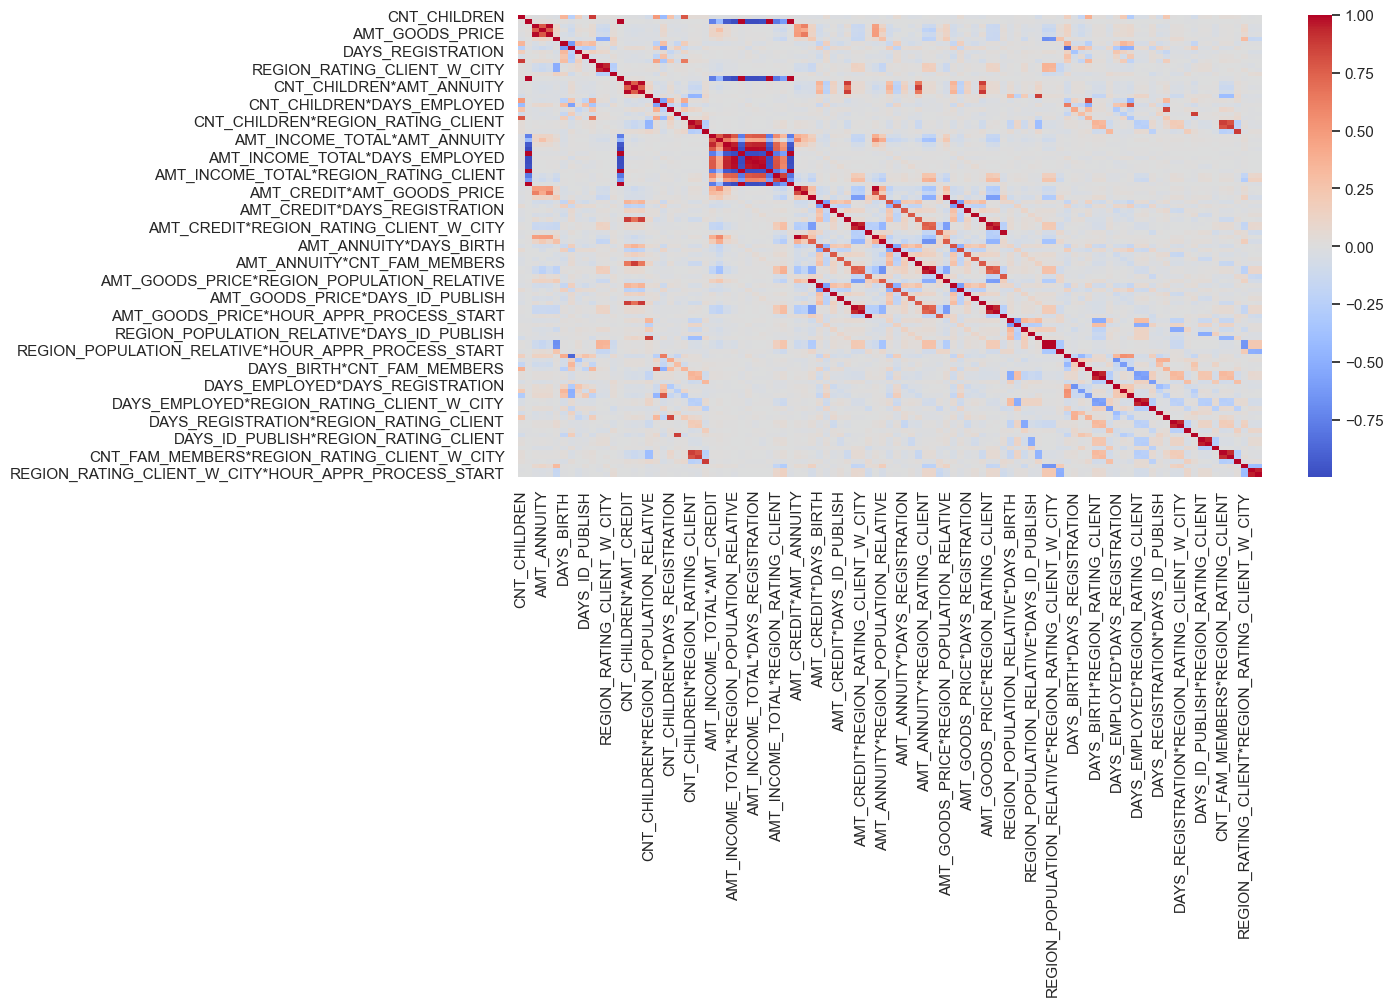

In [57]:
sns.set(font_scale=0.8)
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set(rc={"figure.figsize":(12,6)})
sns.heatmap(df_crossing.corr(), annot=False, cmap="coolwarm")

# Dimension reduction FAMD 

In [34]:
import prince

famd = prince.FAMD(n_components=2, n_iter=3,
                   copy=True, check_input=True,
                   engine='sklearn',random_state=42)

famd = famd.fit(df)
coords = famd.row_coordinates(df)

<AxesSubplot: xlabel='0', ylabel='1'>

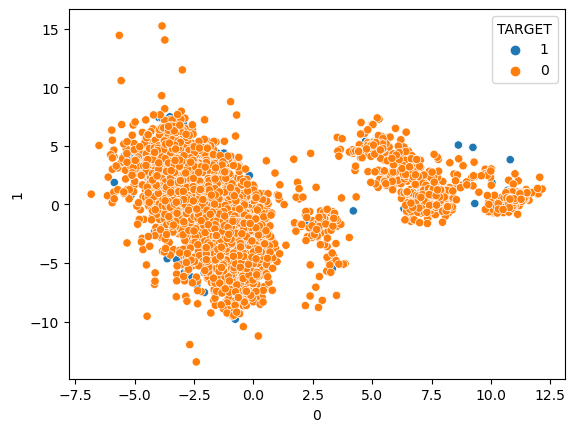

In [35]:
sns.scatterplot(coords, x=0, y=1, hue=df["TARGET"])

# Outlier Detection: Isolation Tree

In [36]:
df.dtypes

TARGET                          object
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                   float64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT           float64
REGION_RATING_CLIENT_W_CITY    float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START        float64
ORGANIZATION_TYPE        

In [37]:
df_dummy = pd.get_dummies(df)

In [50]:
from sklearn.ensemble import IsolationForest
dat_iso = df_dummy
model = IsolationForest(n_estimators = 300,max_samples ='auto',contamination = "auto", max_features = 1.0)
model.fit(dat_iso)
scores = model.decision_function(dat_iso)
anomaly = model.predict(dat_iso)
dat_iso['scores'] = scores
dat_iso['anomaly'] = anomaly
anomaly = dat_iso.loc[dat_iso['anomaly'] == -1]
anomaly_index = list(dat_iso.index)
dat_iso_drop = dat_iso[dat_iso.anomaly == 1]
dat_iso_drop.head()
dat_iso_drop.drop(columns=['scores', 'anomaly'], inplace= True)
dat_iso_drop.head()

/var/folders/sv/npxlc_k53696tn8hryg5dx5w0000gn/T/ipykernel_1918/3678961677.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      2.236032         -0.057275   -0.713707    -0.779527        -0.611812   
2      0.826267         -0.006909   -0.481026     0.367535        -0.464742   
3     -0.583498         -0.034890    0.198591    -0.041131         0.380909   
5     -0.583498         -0.034890   -0.877380     0.187286        -0.869184   
6     -0.583498          0.007082    2.171135     2.151991         2.207027   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.054874    0.194886      -0.462684           0.968039   
2                   -0.810270    0.890329      -0.462607           0.724539   
3                    0.722341    0.093549      -0.492969           0.620868   
5                    0.764792    1.039435      -0.475957           1.210692   
6                    3.810268   -0.473193      -0.499159          -1.210751   

   DAYS_ID_PUBLISH  ...  ORGANIZATION_TYPE_Trade: type 4  \
0         0.685231  ...                                0   
2        -0.920920  ...                                0   
3        -0.464236  ...                                0   
5         0.427545  ...                                0   
6         0.967201  ...                                0   

   ORGANIZATION_TYPE_Trade: type 5  ORGANIZATION_TYPE_Trade: type 6  \
0                                0                                0   
2                                0                                0   
3                                0                                0   
5                                0                                0   
6                                0                                0   

   ORGANIZATION_TYPE_Trade: type 7  ORGANIZATION_TYPE_Transport: type 1  \
0                                1                                    0   
2                                0                                    1   
3                                0                                    0   
5                                0                                    0   
6                                0                                    0   

   ORGANIZATION_TYPE_Transport: type 2  ORGANIZATION_TYPE_Transport: type 3  \
0                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
5                                    0                                    0   
6                                    0                                    0   

   ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  \
0                                    0                             0   
2                                    0                             0   
3                                    0                             0   
5                                    0                             0   
6                                    0                             0   

   ORGANIZATION_TYPE_XNA  
0                      0  
2                      0  
3                      0  
5                      0  
6                      0  

[5 rows x 112 columns]

In [48]:
df_dummy.shape

(5296, 114)

In [52]:
dat_iso_drop.shape

(5282, 112)

In [56]:
num_vars = df.select_dtypes(include=['float', 'int']).columns.tolist()

# Plot each numerical variable
for var in num_vars:
    fig = px.box(dat_iso_drop, x=var)
    fig.show()